In [87]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [88]:
data=pd.read_excel(r"C:\Users\TEJA\Downloads\pm2.5_data.xlsx")

data.set_index('period', inplace=True)

In [89]:
data.head()

,PM_US Post
period,
2010-01-01 23:00:00,129
2010-01-02 00:00:00,148
2010-01-02 01:00:00,159
2010-01-02 02:00:00,181
2010-01-02 03:00:00,138


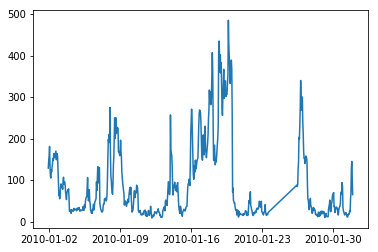

In [98]:
data = data[:654]
plt.plot(data)

In [99]:
data.tail()

,PM_US Post
period,
2010-01-31 19:00:00,71
2010-01-31 20:00:00,129
2010-01-31 21:00:00,145
2010-01-31 22:00:00,101
2010-01-31 23:00:00,65


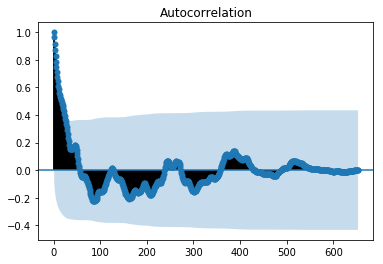

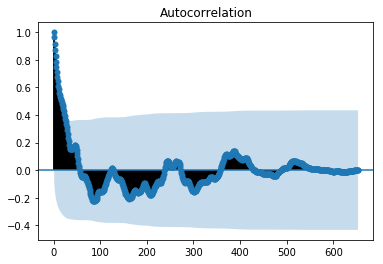

In [100]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize=(20,10))

plot_acf(data)


Differencing the series to convert non stationary into the stationary one.

In [101]:
data.shift(1)

,PM_US Post
period,
2010-01-01 23:00:00,NaN
2010-01-02 00:00:00,129.0
2010-01-02 01:00:00,148.0
2010-01-02 02:00:00,159.0
2010-01-02 03:00:00,181.0
2010-01-02 04:00:00,138.0
2010-01-02 05:00:00,109.0
2010-01-02 06:00:00,105.0
2010-01-02 07:00:00,124.0


In [102]:
data_diff = data.diff(periods=1)

In [103]:
data_diff = data_diff[1:]
data_diff.head()

,PM_US Post
period,
2010-01-02 00:00:00,19.0
2010-01-02 01:00:00,11.0
2010-01-02 02:00:00,22.0
2010-01-02 03:00:00,-43.0
2010-01-02 04:00:00,-29.0


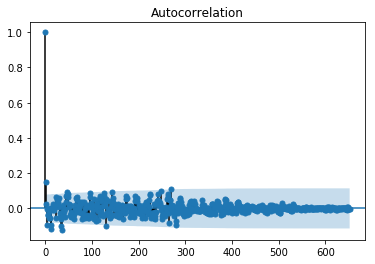

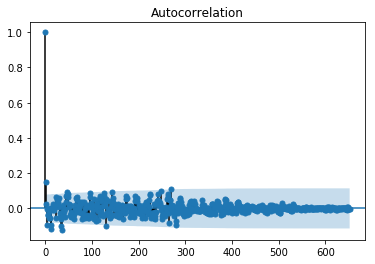

In [104]:
plot_acf(data_diff)

In [105]:
from statsmodels.tsa.ar_model import AR
model_ar = AR(data_diff)
model_ar_fit = model_ar.fit(maxlag=1)

C:\Users\TEJA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [106]:
predictions = model_ar_fit.predict(start=100,end=450)

with the help of rolling mean we can smoothen the data.

In [107]:
testing=data_diff[100:450]
testing=testing.rolling(8).mean()

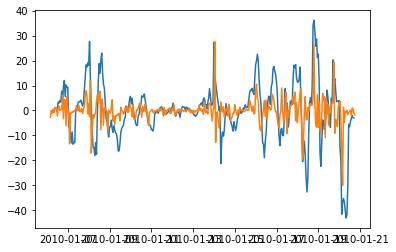

In [108]:
plt.plot(testing)
plt.plot(predictions)

finding the best parameters for the ARIMA model using auto ARIMA.

In [109]:
from pyramid.arima import auto_arima


stepwise_model = auto_arima(data, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=False,d=2, D=1, trace=True,
                           stepwise=True)
print(stepwise_model.aic())


Fit ARIMA: order=(1, 2, 1); AIC=6049.731, BIC=6067.651, Fit time=0.729 seconds
Fit ARIMA: order=(0, 2, 0); AIC=6397.904, BIC=6406.864, Fit time=0.005 seconds
Fit ARIMA: order=(1, 2, 0); AIC=6269.630, BIC=6283.070, Fit time=0.049 seconds
Fit ARIMA: order=(0, 2, 1); AIC=6063.280, BIC=6076.720, Fit time=0.285 seconds
Fit ARIMA: order=(2, 2, 1); AIC=6051.725, BIC=6074.125, Fit time=1.036 seconds
Fit ARIMA: order=(1, 2, 2); AIC=6051.728, BIC=6074.128, Fit time=0.552 seconds
Fit ARIMA: order=(2, 2, 2); AIC=6051.375, BIC=6078.256, Fit time=1.130 seconds
Total fit time: 3.789 seconds
6049.730850230521


In [110]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\TEJA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\TEJA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


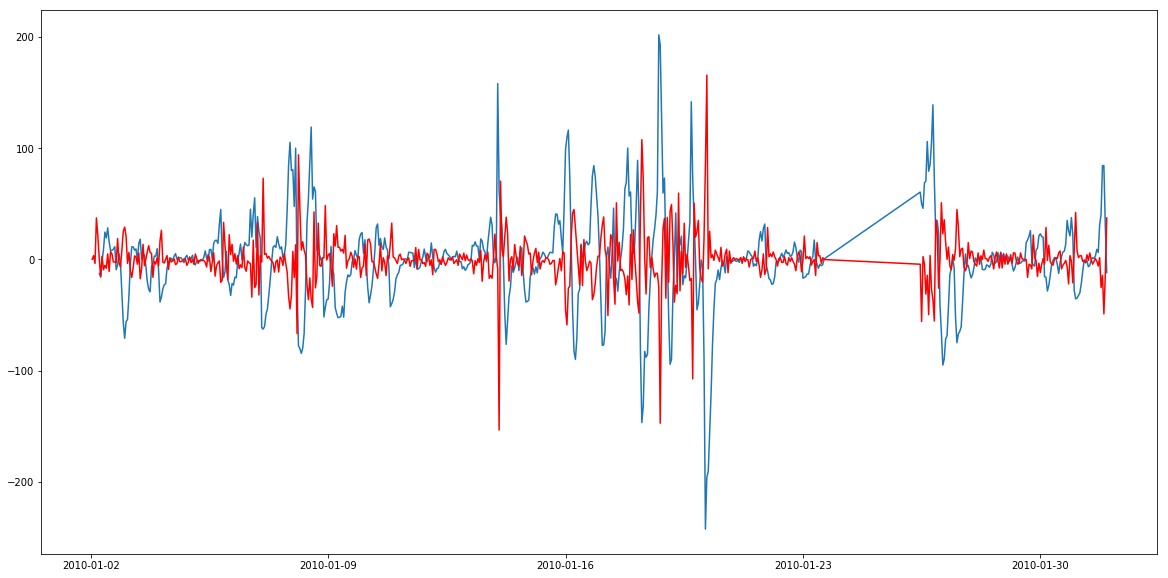

In [111]:
mov_avg=data.rolling(8).mean()
diff=data-mov_avg

model = ARIMA(data, order=(1,2,1))  
arima_fit = model.fit()  
plt.figure(figsize=(20,10))
plt.plot(diff)
plt.plot(arima_fit.fittedvalues, color='red')


In [112]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [113]:
sarimax_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(sarimax_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5989.595, BIC=6011.910, Fit time=2.455 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=6456.908, BIC=6465.834, Fit time=0.097 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=6251.921, BIC=6269.773, Fit time=1.682 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5988.310, BIC=6006.162, Fit time=2.197 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=5985.385, BIC=6007.700, Fit time=2.653 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=6251.972, BIC=6269.825, Fit time=1.730 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=5987.515, BIC=6014.293, Fit time=12.053 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=6437.397, BIC=6450.786, Fit time=0.593 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=5986.479, BIC=6017.721, Fit time=23.299 seconds
Fit ARIMA: order=(1, 1, 1)

finding the best parameters of the SARIMA mode which gives the lowest AIC value

In [114]:
model=SARIMAX(data,order=(0,1,3),seasonal_order=(2,1,1,12))

C:\Users\TEJA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [115]:
model_fit=model.fit()

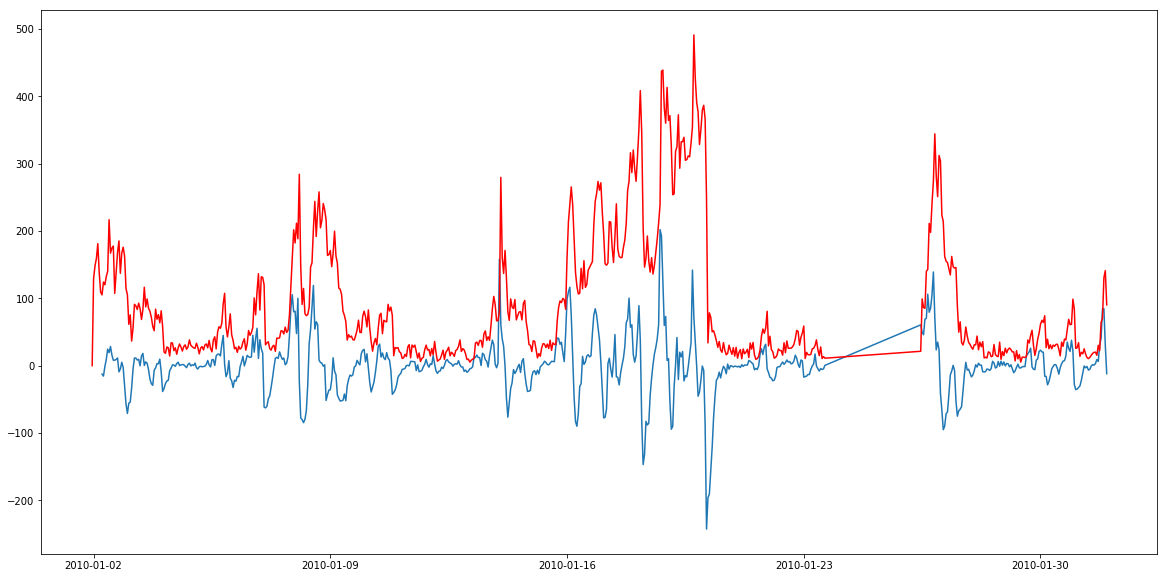

In [116]:
plt.figure(figsize=(20,10))
plt.plot(diff)
plt.plot(model_fit.fittedvalues, color='red')